#### Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


importação das bibliotecas

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Antecedentes e consequente

In [2]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [4]:
qualidade

Antecedent: qualidade

In [5]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [7]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

Membership functions

In [8]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

c:\anaconda3\envs\env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


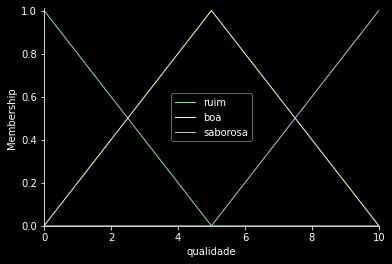

In [9]:
# Visualizando
qualidade.view()

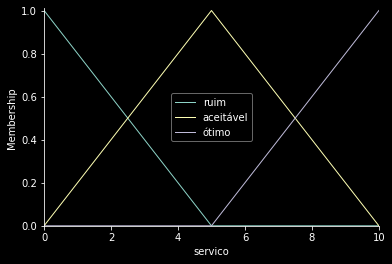

In [10]:
servico.view()

In [11]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

c:\anaconda3\envs\env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


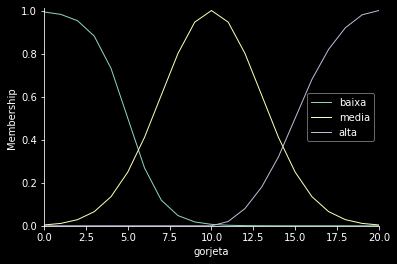

In [12]:
gorjeta.view()

In [13]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

Sistema de Controle

In [14]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [15]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [16]:
sistema.input['qualidade'] = 8.5
sistema.input['servico'] = 6.5 
sistema.compute()

12.465623410643229


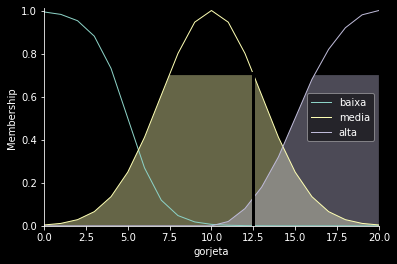

In [17]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

2.8400660011020005


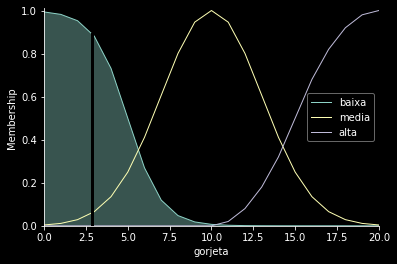

In [18]:
sistema.input['qualidade'] = 0
sistema.input['servico'] = 0
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

17.06666666666667


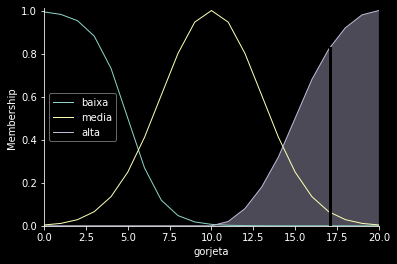

In [19]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

10.000000000000002


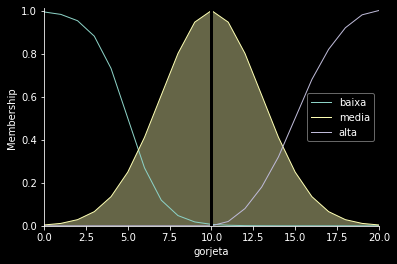

In [20]:
sistema.input['qualidade'] = 5
sistema.input['servico'] = 5
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

13.07


c:\anaconda3\envs\env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


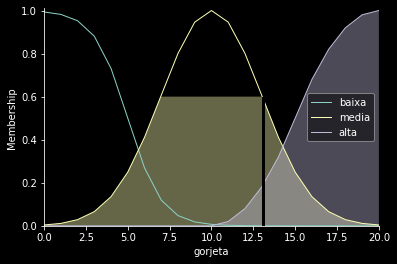

In [21]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 7
sistema.compute()
print(f"{sistema.output['gorjeta']:.2f}")
gorjeta.view(sim=sistema)